In [1]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def parseint(string):
    string = str(string)
    return int(''.join([x for x in string if x.isdigit()]))

In [3]:
with open('movie_info_revised.p' ,'r') as picklefile:
    data = pickle.load(picklefile)

In [4]:
def date_helper(date):
    try:
        date = parser.parse(date)
        return True
    except: 
        pass
    return False

In [15]:
history_keys_dic = defaultdict(dict)
for key in data.keys():
    if 'mafia' in data[key]['keywords'] and 'Crime' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_keys_dic['count'][year]= history_keys_dic['count'].get(year, 0) + 1  
history_df = pd.DataFrame.from_dict(history_keys_dic)
start = pd.datetime(1980, 1, 1)
end = pd.datetime(2016, 1, 1)
x = pd.date_range(start, end, freq='A').year
history_df_years = history_df.reindex(x)
history_df = history_df_years.fillna(0)
history_df['cumulative mean']=pd.expanding_mean(history_df['count']).shift(+1)
history_df['difference from mean']=history_df['count']/history_df['cumulative mean']


In [16]:
history_keys_dic

defaultdict(<type 'dict'>, {'count': {1972: 2, 1973: 10, 1974: 1, 1975: 3, 1976: 3, 1978: 2, 1980: 1, 1981: 2, 1982: 2, 1983: 1, 1984: 3, 1985: 4, 1986: 3, 1987: 4, 1988: 5, 1989: 3, 1990: 11, 1991: 6, 1992: 6, 1993: 5, 1994: 5, 1995: 8, 1996: 8, 1997: 6, 1998: 3, 1999: 5, 2000: 5, 2001: 6, 2002: 7, 2003: 3, 2004: 2, 2005: 3, 2006: 3, 2007: 2, 2008: 4, 2009: 3, 2012: 3, 2013: 2, 2015: 1}})

In [17]:
history_df

,count,cumulative mean,difference from mean
1980,1,NaN,NaN
1981,2,1.000000,2.000000
1982,2,1.500000,1.333333
1983,1,1.666667,0.600000
1984,3,1.500000,2.000000
1985,4,1.800000,2.222222
1986,3,2.166667,1.384615
1987,4,2.285714,1.750000
1988,5,2.500000,2.000000
1989,3,2.777778,1.080000


In [18]:
history_dic = defaultdict(dict)
for key in data.keys():
    if 'mafia' in data[key]['keywords'] and 'Crime' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_dic[year][key]= defaultdict(dict)
            history_dic[year][key]['date']= data[key]['date']
            history_dic[year][key]['screens']= data[key]['screens']
            history_dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)

In [51]:
history_dic

defaultdict(<type 'dict'>, {1978: {'Superman': defaultdict(<type 'dict'>, {'date': '15 December 1978', 'screens': '508', 'opening': '$7,465,343'})}, 1980: {'The Vault of Horror': defaultdict(<type 'dict'>, {'date': '7 August 1980', 'screens': 'Error', 'opening': 'N/A'}), 'Flash Gordon': defaultdict(<type 'dict'>, {'date': '5 December 1980', 'screens': '823', 'opening': '$3,934,030'})}, 1981: {'Superman II': defaultdict(<type 'dict'>, {'date': '19 June 1981', 'screens': '1,397', 'opening': '$14,100,523'}), 'Heavy Metal': defaultdict(<type 'dict'>, {'date': '7 August 1981', 'screens': 'Error', 'opening': 'N/A'})}, 1982: {'Creepshow': defaultdict(<type 'dict'>, {'date': '12 November 1982', 'screens': '1127', 'opening': 5870000}), 'Swamp Thing': defaultdict(<type 'dict'>, {'date': '19 February 1982', 'screens': 'Error', 'opening': 'N/A'})}, 1983: {'Yor, the Hunter from the Future': defaultdict(<type 'dict'>, {'date': '19 August 1983', 'screens': '1,425', 'opening': '$2,810,199'}), 'Superma

In [19]:
def makedf(genre):
    frames = []
    years = []
    for year, movies in genre.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.screens != '']
    genre = genre[genre.opening != '']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    genre = genre[genre.normalized_opening < 17000]
    return genre

In [20]:
genre=makedf(history_dic)

In [21]:
pd.set_option('display.max_rows', 1000)

In [22]:
genre1 = genre[genre.screens > 50]

In [23]:
genre1 = genre1.reset_index()
genre1

,level_0,level_1,date,screens,opening,normalized_opening
0,1982,Monsignor,1982-10-22,857,3631834,4237.845974
1,1983,Revenge of the Ninja,1983-09-16,93,509106,5474.258065
2,1984,Once Upon a Time in America,1984-09-28,894,2412014,2698.002237
3,1985,Prizzi's Honor,1985-06-14,719,4234537,5889.481224
4,1985,Stick,1985-04-26,1173,3358299,2863.000000
5,1985,Year of the Dragon,1985-08-16,982,4093079,4168.104888
6,1986,A Fine Mess,1986-08-08,1162,2620657,2255.298623
7,1986,Murphy's Law,1986-04-18,1260,3388907,2689.608730
8,1986,Wise Guys,1986-04-18,338,1324456,3918.508876
9,1987,Death Wish 4: The Crackdown,1987-11-06,1030,2466557,2394.715534


In [24]:
trend = genre1[38:48]
trend

,level_0,level_1,date,screens,opening,normalized_opening
38,1995,Get Shorty,1995-10-20,1612,12700007,7878.416253
39,1995,Kiss of Death,1995-04-21,1623,5317066,3276.072705
40,1995,Money Train,1995-11-22,2522,10608297,4206.303331
41,1995,The Jerky Boys,1995-02-03,1513,4392403,2903.108394
42,1996,Bound,1996-10-04,261,900902,3451.731801
43,1996,Fled,1996-07-19,2104,5405855,2569.322719
44,1996,Last Man Standing,1996-09-20,2561,7010333,2737.342054
45,1996,Maximum Risk,1996-09-13,2358,5612707,2380.282867
46,1996,Rumble in the Bronx,1996-02-23,1736,9858380,5678.790323
47,1996,Striptease,1996-06-28,1970,12322069,6254.857360


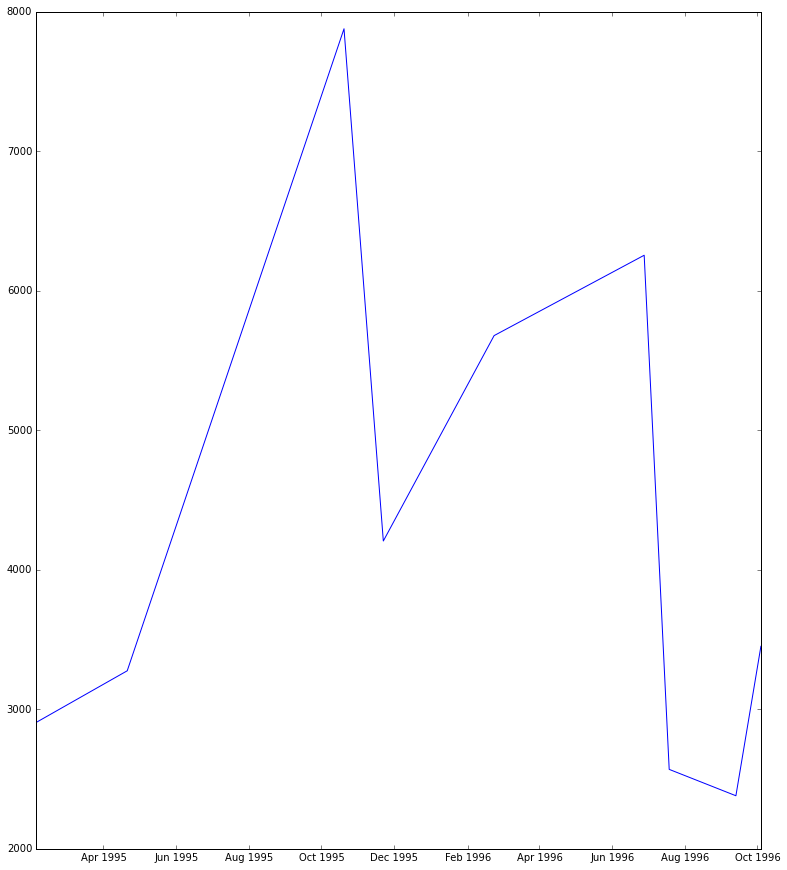

In [25]:
figure(figsize=(13,15))
trend = trend.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

In [29]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('2006-1-13')))

In [52]:
trend

date  screens   opening  \
2006 Glory Road                 2006-01-13     2222  13594734   
     Find Me Guilty             2006-03-17      439    608804   
     The World's Fastest Indian 2006-03-24      114    400782   
     Hollywoodland              2006-09-08     1548   5926177   
     Infamous                   2006-10-13      179    452966   
     One Night with the King    2006-10-13      909   4120497   
     Marie Antoinette           2006-10-20      859   5361050   
     Catch a Fire               2006-10-27      136   2026997   
     The Pursuit of Happyness   2006-12-15     2852  26541709   
2007 Freedom Writers            2007-01-05     1360   9405582   
     Alpha Dog                  2007-01-12     1289   6412775   
     Breach                     2007-02-16     1489  10504990   
     Amazing Grace              2007-02-23      791   4054542   
     Gracie                     2007-06-01     1164   1355904   
     A Mighty Heart             2007-06-22     1355   3948863   
     Elizabeth: The Golden Age  2007-10-12     2001   6153075   
     American Gangster          2007-11-02     3054  43565115   
     Charlie Wilson's War       2007-12-21     2575  15952430   
     The Great Debaters         2007-12-25     1171   6005180   
2008 The Other Boleyn Girl      2008-02-29     1166   8203061   
     21                         2008-03-28     2648  24105943   
     Shine a Light              2008-04-04      276   1488081   
     The Edge of Love           2008-06-20     3012  13907130   
     The Longshots              2008-08-22     2089   4080687   
     Flash of Genius            2008-10-03     1098   2251075   
     The Duchess                2008-10-10     2808   4562675   
     The Express                2008-10-10     2808   4562675   
     W.                         2008-10-17     2030  10505668   
     Cadillac Records           2008-12-05      687   3445559   
2009 Notorious                  2009-01-16     1638  20497596   
     Milk                       2009-01-30      882   1481155   
     The Soloist                2009-04-24     2024   9716458   
     Public Enemies             2009-07-01     3334  25271675   
     In Search of Beethoven     2009-07-10     1858   4919433   
     Julie  Julia               2009-08-07     2354  20027956   
     Amelia                     2009-10-23      820   3904047   
     The Blind Side             2009-11-20     3110  34119372   
     Invictus                   2009-12-11     2125   8611147   

                                 normalized_opening          time_delta  
2006 Glory Road                         6118.242124     0 days 00:00:00  
     Find Me Guilty                     1386.797267    63 days 00:00:00  
     The World's Fastest Indian         3515.631579    70 days 00:00:00  
     Hollywoodland                      3828.279716   238 days 00:00:00  
     Infamous                           2530.536313   273 days 00:00:00  
     One Night with the King            4533.000000   273 days 00:00:00  
     Marie Antoinette                   6241.036088   280 days 00:00:00  
     Catch a Fire                      14904.389706   287 days 00:00:00  
     The Pursuit of Happyness           9306.349579   336 days 00:00:00  
2007 Freedom Writers                    6915.869118   357 days 00:00:00  
     Alpha Dog                          4975.000000   364 days 00:00:00  
     Breach                             7055.063801   399 days 00:00:00  
     Amazing Grace                      5125.843236   406 days 00:00:00  
     Gracie                             1164.865979   504 days 00:00:00  
     A Mighty Heart                     2914.290037   525 days 00:00:00  
     Elizabeth: The Golden Age          3075.000000   637 days 00:00:00  
     American Gangster                 14264.936149   658 days 00:00:00  
     Charlie Wilson's War               6195.118447   707 days 00:00:00  
     The Great Debaters                 5128.249360   711 days 00:00:00  
2008 The Other Boleyn 

In [70]:
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

In [26]:
def sort_season(x):
    if x in [11, 12, 1]:
        return 4
    if x in [5, 6, 7, 8]:
        return 2
    if x in [9, 10,]:
        return 3
    if x in [2, 3, 4,]:
        return 1
    

In [27]:
trend['season']=trend['date'].apply(lambda x: sort_season(x.month))

In [28]:
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season', data = trend, return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')


NameError: name 'time_delta_num' is not defined

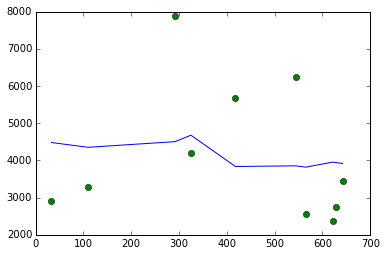

In [31]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('1995-01-01')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x in [11, 12, 1]:
        return 4
    if x in [5, 6, 7, 8]:
        return 2
    if x in [9, 10,]:
        return 3
    if x in [2, 3, 4,]:
        return 1

trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season', data = trend, return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')

